## Изучение данных из файлов

Нам предстоит сделать предварительный анализ двух тарифов "Смарт" и Ультра" на небольшой выборке клиентов компании "Мегалайн". В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф приносит больше денег


In [1]:
#импортируем все библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# читаем файл и сохраняем его в переменной df
df_calls = pd.read_csv('/datasets/calls.csv')
# выведем на экран первые 20 строк таблицы
display(df_calls.head(10))
print(df_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [3]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(df_internet.head(10))
print(df_internet.info())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


In [4]:
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages.head(10))
print(df_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs.head())
print(df_tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [6]:
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head(10))
print(df_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Изучив данные из всех пяти файлов, видим, что пропусков очень мало. Пропуски замечены только в последней таблице в столбце churn_date. Но не будем его заполнять, т.к. скорее всего пользователи еще пользуются тарифом на дату анализа.В столбцах, в которых отражены даты, имеют неверный тип, надо будет изменить на datetime, столбцы user_id  передевем в тип object. Т.к. компания округляет секунды до минут, мегабайты - до гигабайт, необходимо будет столбцы с этими данными округлить в большую сторону.

## Подготовка данных

### Приведение данных к нужному типу

In [7]:
df_calls['user_id'] = df_calls['user_id'].astype('object')
df_internet['user_id'] = df_internet['user_id'].astype('object')
df_messages['user_id'] = df_messages['user_id'].astype('object')
df_users['user_id'] = df_users['user_id'].astype('object')
df_calls['call_date'] = df_calls['call_date'].astype('datetime64')
df_internet['session_date'] = df_internet['session_date'].astype('datetime64')
df_messages['message_date'] = df_messages['message_date'].astype('datetime64')
df_users['churn_date'] = df_users['churn_date'].astype('datetime64')
df_users['reg_date'] = df_users['reg_date'].astype('datetime64')

Проверим изменение типов данных

In [8]:
print(df_calls.info())
print(df_internet.info())
print(df_messages.info())
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.7+ MB
None
<class 'pandas.core.frame.DataFram

Да ,все данные теперь верного типа. Перейдем к округлению столбцов duration в df_calls и mb_used в df_internet в бОльшую сторону.

In [9]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
display(df_calls.head(10))
display(df_internet.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000
5,1000_5,400.0,2018-10-02,1000
6,1000_6,541.0,2018-09-07,1000
7,1000_7,416.0,2018-07-11,1000
8,1000_8,506.0,2018-10-08,1000
9,1000_9,346.0,2018-09-03,1000


Да, теперь все хорошо. Теперь объединим таблицы для удобства анализа. Все таблицы услуг сгруппируем по пользователям и месяцам до объединения. И соединим по этим же столбцам. Соответственно дабавим столбец  month (месяц пользования услугой)во все таблицы услуг.

В столбцах duration в df_calls и mb_used в df_internet присутствуют нули. Не будем ничего с ними делать. Скорее всего, пользователи просто не звонили либо не пользовались интернетом в данный период времени


### Объединение таблиц

Все таблицы услуг сгруппируем по пользователям и месяцам до объединения. И соединим по этим же столбцам. Соответственно дабавим столбец  month (месяц пользования услугой)во все таблицы услуг.

In [10]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
display(df_calls.head(10))
display(df_internet.head(10))
display(df_messages.head(10))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8


,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9
5,1000_5,400.0,2018-10-02,1000,10
6,1000_6,541.0,2018-09-07,1000,9
7,1000_7,416.0,2018-07-11,1000,7
8,1000_8,506.0,2018-10-08,1000,10
9,1000_9,346.0,2018-09-03,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [11]:
df_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
display(df_internet.head(10))
print(df_internet.info())

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
5,1000,10,14717.0
6,1000,11,14768.0
7,1000,12,9827.0
8,1001,11,18452.0
9,1001,12,14053.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB
None


In [12]:
df_calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
display(df_calls.head(10))
print(df_calls.info())

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
5,1000,10,350.0
6,1000,11,338.0
7,1000,12,333.0
8,1001,11,430.0
9,1001,12,414.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3174 non-null   int64  
 1   month     3174 non-null   int64  
 2   duration  3174 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 74.5 KB
None


In [13]:
#df_messages = df_messages.groupby(['user_id', 'month']).agg({'month':'count'}).reset_index()
df_messages = df_messages.pivot_table(index=['user_id', 'month'], aggfunc='count').reset_index()
display(df_messages.head(10))
print(df_messages.info())

,user_id,month,id,message_date
0,1000,5,22,22
1,1000,6,60,60
2,1000,7,75,75
3,1000,8,81,81
4,1000,9,57,57
5,1000,10,73,73
6,1000,11,58,58
7,1000,12,70,70
8,1002,6,4,4
9,1002,7,11,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       2717 non-null   int64
 1   month         2717 non-null   int64
 2   id            2717 non-null   int64
 3   message_date  2717 non-null   int64
dtypes: int64(4)
memory usage: 85.0 KB
None


Теперь объединим все таблицы по услугам

In [14]:
df_service = df_calls.merge(df_internet, on=['user_id', 'month'], how='outer')
df_service = df_service.merge(df_messages, on=['user_id', 'month'], how='outer')
display(df_service.head(10))
print(df_service.info())

,user_id,month,duration,mb_used,id,message_date
0,1000,5,159.0,2256.0,22.0,22.0
1,1000,6,172.0,23257.0,60.0,60.0
2,1000,7,340.0,14016.0,75.0,75.0
3,1000,8,408.0,14070.0,81.0,81.0
4,1000,9,466.0,14581.0,57.0,57.0
5,1000,10,350.0,14717.0,73.0,73.0
6,1000,11,338.0,14768.0,58.0,58.0
7,1000,12,333.0,9827.0,70.0,70.0
8,1001,11,430.0,18452.0,NaN,NaN
9,1001,12,414.0,14053.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       3214 non-null   int64  
 1   month         3214 non-null   int64  
 2   duration      3174 non-null   float64
 3   mb_used       3203 non-null   float64
 4   id            2717 non-null   float64
 5   message_date  2717 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB
None


Теперь объединим таблицу по услугам с таблицей по пользователям.

In [15]:
df = df_users.merge(df_service, on=['user_id'], how='inner')
df =  df.rename(columns={'id': 'message'})
df =  df.drop('message_date', axis=1)
display(df.head(10))
print(df.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,message
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159.0,2256.0,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172.0,23257.0,60.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340.0,14016.0,75.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408.0,14070.0,81.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466.0,14581.0,57.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,350.0,14717.0,73.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11,338.0,14768.0,58.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,333.0,9827.0,70.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,430.0,18452.0,NaN
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,12,414.0,14053.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3214 non-null   object        
 1   age         3214 non-null   int64         
 2   churn_date  187 non-null    datetime64[ns]
 3   city        3214 non-null   object        
 4   first_name  3214 non-null   object        
 5   last_name   3214 non-null   object        
 6   reg_date    3214 non-null   datetime64[ns]
 7   tariff      3214 non-null   object        
 8   month       3214 non-null   int64         
 9   duration    3174 non-null   float64       
 10  mb_used     3203 non-null   float64       
 11  message     2717 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 326.4+ KB
None


In [16]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
df = df.merge(df_tariffs, on=['tariff'], how='inner')
display(df.head(10))
print(df.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159.0,2256.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172.0,23257.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340.0,14016.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408.0,14070.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466.0,14581.0,57.0,1000,30720,3000,1950,150,1,1
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,350.0,14717.0,73.0,1000,30720,3000,1950,150,1,1
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11,338.0,14768.0,58.0,1000,30720,3000,1950,150,1,1
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,333.0,9827.0,70.0,1000,30720,3000,1950,150,1,1
8,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,380.0,8571.0,37.0,1000,30720,3000,1950,150,1,1
9,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,9,961.0,12479.0,91.0,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   object        
 1   age                    3214 non-null   int64         
 2   churn_date             187 non-null    datetime64[ns]
 3   city                   3214 non-null   object        
 4   first_name             3214 non-null   object        
 5   last_name              3214 non-null   object        
 6   reg_date               3214 non-null   datetime64[ns]
 7   tariff                 3214 non-null   object        
 8   month                  3214 non-null   int64         
 9   duration               3174 non-null   float64       
 10  mb_used                3203 non-null   float64       
 11  message                2717 non-null   float64       
 12  messages_included      3214 non-null   int64         
 13  mb_

<div class="alert alert-info">
Оставим в рабочей таблице только ту информацию, которая нам будет необходима для дальнейшей работы
</div>
<font color='red'> </font>     

In [17]:
df = df[['user_id', 'city', 'tariff', 'month', 'duration', 'mb_used', 'message', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']]
display(df.head(10))
print(df.info())

,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,5,159.0,2256.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,Краснодар,ultra,6,172.0,23257.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,Краснодар,ultra,7,340.0,14016.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,Краснодар,ultra,8,408.0,14070.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,Краснодар,ultra,9,466.0,14581.0,57.0,1000,30720,3000,1950,150,1,1
5,1000,Краснодар,ultra,10,350.0,14717.0,73.0,1000,30720,3000,1950,150,1,1
6,1000,Краснодар,ultra,11,338.0,14768.0,58.0,1000,30720,3000,1950,150,1,1
7,1000,Краснодар,ultra,12,333.0,9827.0,70.0,1000,30720,3000,1950,150,1,1
8,1003,Москва,ultra,8,380.0,8571.0,37.0,1000,30720,3000,1950,150,1,1
9,1003,Москва,ultra,9,961.0,12479.0,91.0,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   object 
 1   city                   3214 non-null   object 
 2   tariff                 3214 non-null   object 
 3   month                  3214 non-null   int64  
 4   duration               3174 non-null   float64
 5   mb_used                3203 non-null   float64
 6   message                2717 non-null   float64
 7   messages_included      3214 non-null   int64  
 8   mb_per_month_included  3214 non-null   int64  
 9   minutes_included       3214 non-null   int64  
 10  rub_monthly_fee        3214 non-null   int64  
 11  rub_per_gb             3214 non-null   int64  
 12  rub_per_message        3214 non-null   int64  
 13  rub_per_minute         3214 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 376.6+ 

<div class="alert alert-info">
Видим, что в столбцах duration, mb_used, message есть пропуски. 
Методом isna() найдём все строки с пропусками в этих столбцах и просмотрим первые пять    
 
</div>
<font color='blue'> </font>     


In [18]:
display(df[df['duration'].isna()].head(5))
display(df[df['mb_used'].isna()].head(5))
display(df[df['message'].isna()].head(5))

,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
151,1091,Набережные Челны,ultra,5,NaN,10714.0,30.0,1000,30720,3000,1950,150,1,1
152,1091,Набережные Челны,ultra,6,NaN,10245.0,30.0,1000,30720,3000,1950,150,1,1
153,1091,Набережные Челны,ultra,7,NaN,16460.0,35.0,1000,30720,3000,1950,150,1,1
154,1091,Набережные Челны,ultra,8,NaN,12644.0,31.0,1000,30720,3000,1950,150,1,1
155,1091,Набережные Челны,ultra,9,NaN,16611.0,32.0,1000,30720,3000,1950,150,1,1


,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
476,1273,Курган,ultra,5,220.0,NaN,21.0,1000,30720,3000,1950,150,1,1
477,1273,Курган,ultra,6,230.0,NaN,38.0,1000,30720,3000,1950,150,1,1
478,1273,Курган,ultra,7,253.0,NaN,37.0,1000,30720,3000,1950,150,1,1
479,1273,Курган,ultra,8,253.0,NaN,41.0,1000,30720,3000,1950,150,1,1
480,1273,Курган,ultra,9,223.0,NaN,32.0,1000,30720,3000,1950,150,1,1


,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
49,1024,Санкт-Петербург,ultra,10,79.0,3313.0,NaN,1000,30720,3000,1950,150,1,1
50,1024,Санкт-Петербург,ultra,11,1146.0,43146.0,NaN,1000,30720,3000,1950,150,1,1
51,1024,Санкт-Петербург,ultra,12,949.0,35985.0,NaN,1000,30720,3000,1950,150,1,1
67,1049,Москва,ultra,3,403.0,6201.0,NaN,1000,30720,3000,1950,150,1,1
68,1049,Москва,ultra,4,528.0,5295.0,NaN,1000,30720,3000,1950,150,1,1


<div class="alert alert-info">
Скорее всего, пропуски возникли из-за того, что пользователь в данном месяце не использовал соответствующие услуги. Поэтому заменим все пропуски в этих столбцах на нули
</div>
<font color='blue'> </font> 

In [19]:
df['duration'] = df['duration'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df['message'] = df['message'].fillna(0)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   object 
 1   city                   3214 non-null   object 
 2   tariff                 3214 non-null   object 
 3   month                  3214 non-null   int64  
 4   duration               3214 non-null   float64
 5   mb_used                3214 non-null   float64
 6   message                3214 non-null   float64
 7   messages_included      3214 non-null   int64  
 8   mb_per_month_included  3214 non-null   int64  
 9   minutes_included       3214 non-null   int64  
 10  rub_monthly_fee        3214 non-null   int64  
 11  rub_per_gb             3214 non-null   int64  
 12  rub_per_message        3214 non-null   int64  
 13  rub_per_minute         3214 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 376.6+ 

Все, теперь пропусков нет.
Таким образом, из полученной таблицы мы извлекаем следующую информацию (по каждому пользователю в помесячной разбивке):
1. Количество израсходованных минут разговоров (столбец duration),
2. Количество отправленных сообщений (столбец message),
3. Объем израсходованного интернет-трафика (столбец mb_used).
Добавим столбец с помесячной выручкой от каждого пользователя.


### Расчет помесячной выручки от каждого пользователя

Выручку от каждого пользователя определим следующим образом: количество платных (сверх абон.платы) звонков, трафика, смс умножим на соответствующий тарим + абон.плата.
Но для начала переведем слолбцы с мегабайтами в килобайты из расчета 1 ГБайт = 1024 МБайта


In [20]:
df['gb_used'] = np.ceil(df['mb_used']/1024)
df['gb_per_month_included'] = df['mb_per_month_included']/1024
display(df.head())

,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included
0,1000,Краснодар,ultra,5,159.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,3.0,30.0
1,1000,Краснодар,ultra,6,172.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,23.0,30.0
2,1000,Краснодар,ultra,7,340.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,14.0,30.0
3,1000,Краснодар,ultra,8,408.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,14.0,30.0
4,1000,Краснодар,ultra,9,466.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,15.0,30.0


Теперь добавим столбцы с перерасходом: минут, гигабайтов, количества сообщений. 
Для этого напишем функции для каждого перерасхода

In [21]:
def over_minute(row):
    duration = row['duration']
    minutes_included = row['minutes_included']
    if duration>minutes_included:
        return duration-minutes_included
    return 0
df['over_minute'] = df.apply(over_minute, axis=1)
display(df.head())


,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,over_minute
0,1000,Краснодар,ultra,5,159.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,3.0,30.0,0.0
1,1000,Краснодар,ultra,6,172.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,23.0,30.0,0.0
2,1000,Краснодар,ultra,7,340.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,14.0,30.0,0.0
3,1000,Краснодар,ultra,8,408.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,14.0,30.0,0.0
4,1000,Краснодар,ultra,9,466.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,15.0,30.0,0.0


In [22]:
def over_gb(row):
    gb_used = row['gb_used']
    gb_per_month_included = row['gb_per_month_included']
    if gb_used>gb_per_month_included:
        return gb_used-gb_per_month_included
    return 0
df['over_gb'] = df.apply(over_gb, axis=1)


In [23]:
def over_message(row):
    message = row['message']
    messages_included = row['messages_included']
    if message>messages_included:
        return message-messages_included
    return 0
df['over_message'] = df.apply(over_message, axis=1)
display(df.head())
print(df.info())

,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,over_minute,over_gb,over_message
0,1000,Краснодар,ultra,5,159.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,3.0,30.0,0.0,0.0,0.0
1,1000,Краснодар,ultra,6,172.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,23.0,30.0,0.0,0.0,0.0
2,1000,Краснодар,ultra,7,340.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,14.0,30.0,0.0,0.0,0.0
3,1000,Краснодар,ultra,8,408.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,14.0,30.0,0.0,0.0,0.0
4,1000,Краснодар,ultra,9,466.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,15.0,30.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   object 
 1   city                   3214 non-null   object 
 2   tariff                 3214 non-null   object 
 3   month                  3214 non-null   int64  
 4   duration               3214 non-null   float64
 5   mb_used                3214 non-null   float64
 6   message                3214 non-null   float64
 7   messages_included      3214 non-null   int64  
 8   mb_per_month_included  3214 non-null   int64  
 9   minutes_included       3214 non-null   int64  
 10  rub_monthly_fee        3214 non-null   int64  
 11  rub_per_gb             3214 non-null   int64  
 12  rub_per_message        3214 non-null   int64  
 13  rub_per_minute         3214 non-null   int64  
 14  gb_used                3214 non-null   float64
 15  gb_p

Проверим корректность рассчета

In [24]:
display(df.query('over_minute>0' and 'over_gb>0' and 'over_message>0'))

,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,over_minute,over_gb,over_message
996,1005,Набережные Челны,smart,3,606.0,11117.0,56.0,50,15360,500,550,200,3,3,11.0,15.0,106.0,0.0,6.0
1000,1005,Набережные Челны,smart,7,569.0,7703.0,56.0,50,15360,500,550,200,3,3,8.0,15.0,69.0,0.0,6.0
1001,1005,Набережные Челны,smart,8,619.0,7554.0,64.0,50,15360,500,550,200,3,3,8.0,15.0,119.0,0.0,14.0
1002,1005,Набережные Челны,smart,9,479.0,7027.0,52.0,50,15360,500,550,200,3,3,7.0,15.0,0.0,0.0,2.0
1004,1005,Набережные Челны,smart,11,547.0,12682.0,51.0,50,15360,500,550,200,3,3,13.0,15.0,47.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,1490,Москва,smart,7,250.0,10811.0,62.0,50,15360,500,550,200,3,3,11.0,15.0,0.0,0.0,12.0
3202,1496,Вологда,smart,12,518.0,20757.0,51.0,50,15360,500,550,200,3,3,21.0,15.0,18.0,6.0,1.0
3207,1498,Владикавказ,smart,8,400.0,24270.0,62.0,50,15360,500,550,200,3,3,24.0,15.0,0.0,9.0,12.0
3212,1499,Пермь,smart,11,612.0,17984.0,59.0,50,15360,500,550,200,3,3,18.0,15.0,112.0,3.0,9.0


Да, все верно. Настало время добавить столбец с помесячной выручкой по каждому абоненту

In [25]:
df['revenue'] = df['rub_monthly_fee'] + df['over_minute']*df['rub_per_minute'] + df['over_gb']*df['rub_per_gb'] + df['over_message']*df['rub_per_message']
display(df.query('over_minute>0' and 'over_gb>0' and 'over_message>0'))

,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,over_minute,over_gb,over_message,revenue
996,1005,Набережные Челны,smart,3,606.0,11117.0,56.0,50,15360,500,550,200,3,3,11.0,15.0,106.0,0.0,6.0,886.0
1000,1005,Набережные Челны,smart,7,569.0,7703.0,56.0,50,15360,500,550,200,3,3,8.0,15.0,69.0,0.0,6.0,775.0
1001,1005,Набережные Челны,smart,8,619.0,7554.0,64.0,50,15360,500,550,200,3,3,8.0,15.0,119.0,0.0,14.0,949.0
1002,1005,Набережные Челны,smart,9,479.0,7027.0,52.0,50,15360,500,550,200,3,3,7.0,15.0,0.0,0.0,2.0,556.0
1004,1005,Набережные Челны,smart,11,547.0,12682.0,51.0,50,15360,500,550,200,3,3,13.0,15.0,47.0,0.0,1.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,1490,Москва,smart,7,250.0,10811.0,62.0,50,15360,500,550,200,3,3,11.0,15.0,0.0,0.0,12.0,586.0
3202,1496,Вологда,smart,12,518.0,20757.0,51.0,50,15360,500,550,200,3,3,21.0,15.0,18.0,6.0,1.0,1807.0
3207,1498,Владикавказ,smart,8,400.0,24270.0,62.0,50,15360,500,550,200,3,3,24.0,15.0,0.0,9.0,12.0,2386.0
3212,1499,Пермь,smart,11,612.0,17984.0,59.0,50,15360,500,550,200,3,3,18.0,15.0,112.0,3.0,9.0,1513.0


Все получилось, столбец добавлен. выручка рассчитана верно.

Напишем единую функцию, которая сразу будет возвращать выручку. Потом сравним полученный результат с первоначальным вариантом


In [26]:
def revenue2(row):
    revenue2 = row['rub_monthly_fee']
    gb_used = row['gb_used']
    gb_per_month_included = row['gb_per_month_included']
    duration = row['duration']
    minutes_included = row['minutes_included']
    message = row['message']
    messages_included = row['messages_included']
    rub_per_gb = row['rub_per_gb'] 
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    if gb_used>gb_per_month_included:
        revenue2+=((gb_used-gb_per_month_included)*rub_per_gb)
    if duration>minutes_included:
        revenue2+=((duration-minutes_included)*rub_per_minute)
    if message>messages_included:
        revenue2+=((message-messages_included)*rub_per_message)
    return revenue2 
df['revenue2'] = df.apply(revenue2, axis=1)
display(df.query('over_minute>0' and 'over_gb>0' and 'over_message>0'))
display(df.head())


,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,over_minute,over_gb,over_message,revenue,revenue2
996,1005,Набережные Челны,smart,3,606.0,11117.0,56.0,50,15360,500,...,200,3,3,11.0,15.0,106.0,0.0,6.0,886.0,886.0
1000,1005,Набережные Челны,smart,7,569.0,7703.0,56.0,50,15360,500,...,200,3,3,8.0,15.0,69.0,0.0,6.0,775.0,775.0
1001,1005,Набережные Челны,smart,8,619.0,7554.0,64.0,50,15360,500,...,200,3,3,8.0,15.0,119.0,0.0,14.0,949.0,949.0
1002,1005,Набережные Челны,smart,9,479.0,7027.0,52.0,50,15360,500,...,200,3,3,7.0,15.0,0.0,0.0,2.0,556.0,556.0
1004,1005,Набережные Челны,smart,11,547.0,12682.0,51.0,50,15360,500,...,200,3,3,13.0,15.0,47.0,0.0,1.0,694.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,1490,Москва,smart,7,250.0,10811.0,62.0,50,15360,500,...,200,3,3,11.0,15.0,0.0,0.0,12.0,586.0,586.0
3202,1496,Вологда,smart,12,518.0,20757.0,51.0,50,15360,500,...,200,3,3,21.0,15.0,18.0,6.0,1.0,1807.0,1807.0
3207,1498,Владикавказ,smart,8,400.0,24270.0,62.0,50,15360,500,...,200,3,3,24.0,15.0,0.0,9.0,12.0,2386.0,2386.0
3212,1499,Пермь,smart,11,612.0,17984.0,59.0,50,15360,500,...,200,3,3,18.0,15.0,112.0,3.0,9.0,1513.0,1513.0


,user_id,city,tariff,month,duration,mb_used,message,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,over_minute,over_gb,over_message,revenue,revenue2
0,1000,Краснодар,ultra,5,159.0,2256.0,22.0,1000,30720,3000,...,150,1,1,3.0,30.0,0.0,0.0,0.0,1950.0,1950.0
1,1000,Краснодар,ultra,6,172.0,23257.0,60.0,1000,30720,3000,...,150,1,1,23.0,30.0,0.0,0.0,0.0,1950.0,1950.0
2,1000,Краснодар,ultra,7,340.0,14016.0,75.0,1000,30720,3000,...,150,1,1,14.0,30.0,0.0,0.0,0.0,1950.0,1950.0
3,1000,Краснодар,ultra,8,408.0,14070.0,81.0,1000,30720,3000,...,150,1,1,14.0,30.0,0.0,0.0,0.0,1950.0,1950.0
4,1000,Краснодар,ultra,9,466.0,14581.0,57.0,1000,30720,3000,...,150,1,1,15.0,30.0,0.0,0.0,0.0,1950.0,1950.0


Да, выручка, рассчитанная вторым способом (одна функция) равна выручке по первому варианту. Значит функция написана верно. Теперь оставим в таблице только столбцы, которые будут нам нужны для дальнейшего анализа


In [27]:
df = df[['user_id', 'city', 'tariff', 'month', 'duration', 'gb_used', 'message', 'revenue']]
display(df.head(10))
print(df.info())

,user_id,city,tariff,month,duration,gb_used,message,revenue
0,1000,Краснодар,ultra,5,159.0,3.0,22.0,1950.0
1,1000,Краснодар,ultra,6,172.0,23.0,60.0,1950.0
2,1000,Краснодар,ultra,7,340.0,14.0,75.0,1950.0
3,1000,Краснодар,ultra,8,408.0,14.0,81.0,1950.0
4,1000,Краснодар,ultra,9,466.0,15.0,57.0,1950.0
5,1000,Краснодар,ultra,10,350.0,15.0,73.0,1950.0
6,1000,Краснодар,ultra,11,338.0,15.0,58.0,1950.0
7,1000,Краснодар,ultra,12,333.0,10.0,70.0,1950.0
8,1003,Москва,ultra,8,380.0,9.0,37.0,1950.0
9,1003,Москва,ultra,9,961.0,13.0,91.0,1950.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   object 
 1   city      3214 non-null   object 
 2   tariff    3214 non-null   object 
 3   month     3214 non-null   int64  
 4   duration  3214 non-null   float64
 5   gb_used   3214 non-null   float64
 6   message   3214 non-null   float64
 7   revenue   3214 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 226.0+ KB
None


## Анализ данных

Подсчитаем среднее количество минут разговора, среднее количество отправленных сообщений, среднее количество интернет-трафика и среднюю выручку для каждого из тарифов

In [28]:

#df_mean = df.groupby('tariff').agg({'duration': 'mean', 'gb_used':'mean', 'message': 'mean', 'revenue':'mean'})
df_mean = df.groupby('tariff')['duration','gb_used','message', 'revenue'].mean()
display(df_mean)

/tmp/ipykernel_90/3472202348.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df.groupby('tariff')['duration','gb_used','message', 'revenue'].mean()


,duration,gb_used,message,revenue
tariff,,,,
smart,417.934948,16.359354,33.384029,1294.63930
ultra,526.623350,19.525888,49.363452,2071.06599


Видим, что пользователи тарифом smart в среднем укладываются в предоставленные лимиты, кроме интернет-трафика (15,36 гБ лимит, средний расход 15,85 гБ).
Пользователи тарифом ultra тратят намного меньше предоставленных лимитов.
Теперь посчитаем дисперсию и стандартное отклонение каждого из параметров для каждого тарифа.

### Тариф ultra

In [29]:
df_ultra = df.query('tariff=="ultra"')
ultra = df_ultra[['duration', 'gb_used', 'message', 'revenue']].describe().T
ultra['var'] = df_ultra[['duration', 'gb_used', 'message', 'revenue']].var(ddof=1)
ultra = ultra[['mean', 'std', 'var']]
display(ultra)



,mean,std,var
duration,526.623350,317.606098,100873.633397
gb_used,19.525888,9.865848,97.334949
message,49.363452,47.804457,2285.266143
revenue,2071.065990,378.802377,143491.240560


Таким образом, для тарифа ultra получили следующие характеристики:
1. Средняя продолжительность разговоров в месяц 527 минут, среднее отклонение 317,6 минут, дисперсия 100874 мин.
2. Среднемесячное количество гБайт, используемое одним пользователем, равно 19,5гБ, среднее отклонение 9,87 гБ, дисперсия 97,33 гБ.
3. Среднее количество сообщений, отправленных одним пользователем, равно 49, среднее отклонение 47,8, дисперсия 2285.
4. Среднемесячная выручка от одного абонента 2071 руб., среднее отклонение 378,8 руб., дисперсия 143491 руб.

### Тариф smart

In [30]:
df_smart = df.query('tariff=="smart"')
smart = df_smart[['duration', 'gb_used', 'message', 'revenue']].describe().T
smart['var'] = df_smart[['duration', 'gb_used', 'message', 'revenue']].var(ddof=1)
smart = smart[['mean', 'std', 'var']]
display(smart)

,mean,std,var
duration,417.934948,190.313730,36219.315784
gb_used,16.359354,5.758498,33.160304
message,33.384029,28.227876,796.812958
revenue,1294.639300,820.933202,673931.321363


Для тарифа smart получили следующие характеристики:
1. Средняя продолжительность разговоров в месяц 418 минут, среднее отклонение 190 минут, дисперсия 36219 мин.
2. Среднемесячное количество гБайт, используемое одним пользователем, равно 16,36, среднее отклонение 5,75 гБ, дисперсия 33,16 гБ.
3. Среднее количество сообщений, отправленных одним пользователем, равно 33,3, среднее отклонение 28,2, дисперсия 796,8.
4. Среднемесячная выручка от одного абонента 1294,63 руб., среднее отклонение 821 руб., дисперсия 673931 руб.

### Построение гистограмм

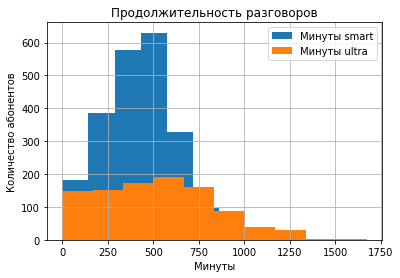

In [31]:
ax=df_smart['duration'].plot(kind='hist', label = 'Минуты smart', title='Продолжительность разговоров', legend = True)
df_ultra['duration'].plot(kind='hist', ax=ax, label = 'Минуты ultra', grid = True, legend = True) 
plt.xlabel('Минуты')
plt.ylabel('Количество абонентов')
plt.show()

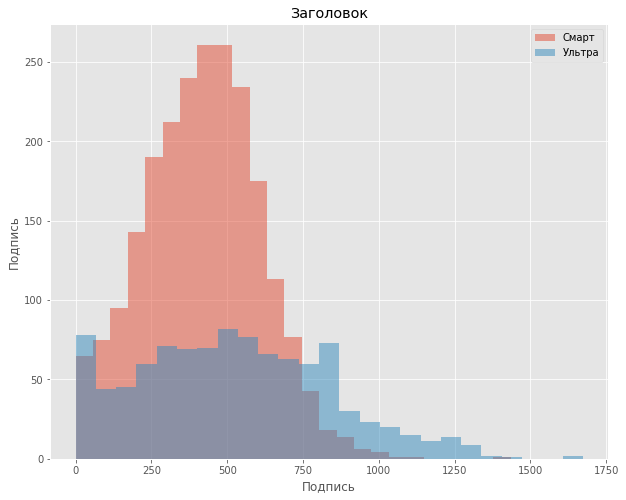

In [32]:
plt.style.use('ggplot') # Добавлю стиль. Запустить достаточно лишь 1 раз.

df.groupby('tariff')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

plt.show()

Из гистограммы видно, что пользователи тарифом smart разговаривают в месяц не более 800 минут, при этом наибольшее количество пользователей разговаривают от 450 до 550 минут. Пользователи ultra в месяц могут разговаривать до 1700 минут, но наибольшее количество разговаривают также от 500 до 650 минут. 

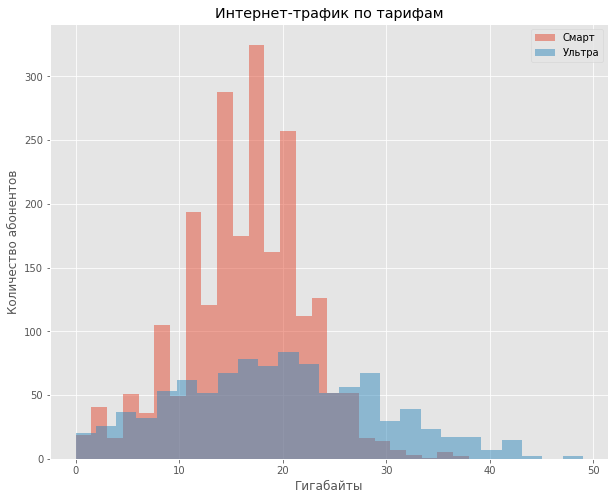

In [33]:
#ax=df_smart['gb_used'].plot(kind='hist', label = 'Гигабайты smart', title='Интернет-трафик по тарифам', legend = True)
#df_ultra['gb_used'].plot(kind='hist', ax=ax, label = 'Гигабайты ultra', grid = True, legend = True) 
#plt.xlabel('Гигабайты')
#plt.ylabel('Количество абонентов')
#plt.show()

df.groupby('tariff')['gb_used'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Интернет-трафик по тарифам')
plt.xlabel('Гигабайты')
plt.ylabel('Количество абонентов')

plt.show()

Видим, что пользователи тарифом smart расходуют в месяц не более 26 гБайт, при этом наибольшее количество пользователей расходуют 15-18 гБайт. Пользователи ultra в месяц расходуют до 45 гБайт, но наибольшее количество расходуют как и пользователи smart 15-18 гБайт.

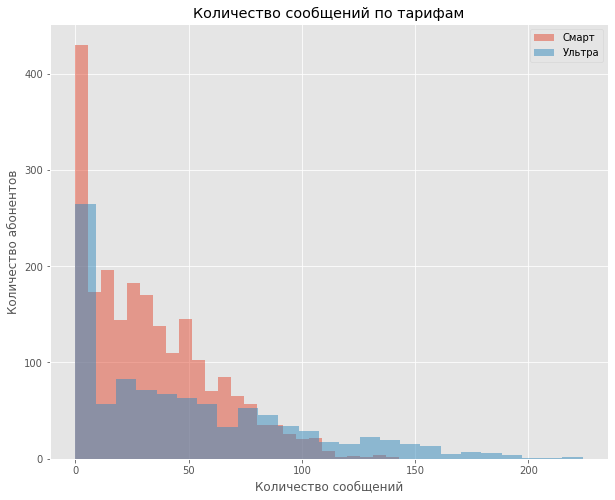

In [34]:
#ax=df_smart['message'].plot(kind='hist', label = 'Сообщения smart', title='Количество сообщений по тарифам', legend = True)
#df_ultra['message'].plot(kind='hist', ax=ax, label = 'Сообщения ultra', grid = True, legend = True) 

df.groupby('tariff')['message'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Количество сообщений по тарифам')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество абонентов')
plt.show()



Пользователи тарифом smart отправляют ежемесячно не более 80 сообщений, при этом наибольшее количество пользователей отправляют около 25 sms-ок. Пользователи ultra в месяц отправляют до 250 сообщений, но наибольшее количество отправляют как и пользователи smart 25 до sms-ок.

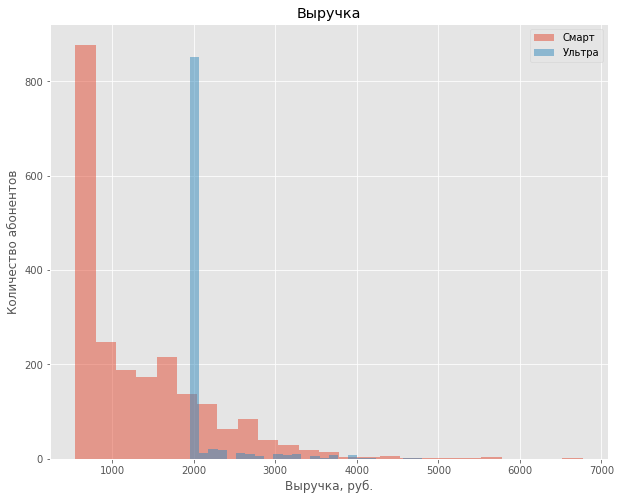

In [35]:
df.groupby('tariff')['revenue'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))
plt.legend(['Смарт', 'Ультра'])
plt.title('Выручка')
plt.xlabel('Выручка, руб.')
plt.ylabel('Количество абонентов')
plt.show()


Видим, что несмотря на то, что средняя выручка на одного абонента по тарифу smart меньше выручки ultra, наибольшую выручку компании приносит именно smart. 

## Проверка гипотез

### Средняя выручка пользователей двух тарифов различаются

Нулевая гипотеза (Н0) - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.
Альтернативная гипотеза (Н1) - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
Для проверки Н0 используем ttest, alpha =5%, т.к. дисперсии разные параметру equal_var присвоим значение  False. 

In [36]:
smart_revenue = df_smart['revenue']
ultra_revenue = df_ultra['revenue']
alpha = 0.05
results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  2.7240946993530856e-246
Отвергаем нулевую гипотезу


Таким образом, ttest подтвердил наше заключение, полученное в предыдущем разделе, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Т.к. pvalue = 8,9 в минус 296 степени, опровергаем нулевую гипотезу.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза (Н0) - средняя выручка абонентов-москвичей и абонентов из других регионов одинакова. Альтернативная гипотеза (Н1) - средняя выручка абонентов-москвичей и абонентов из других регионов различаются. alpha =5%.


In [37]:
moscow_revenue = df[df['city']=='Москва']['revenue']
region_revenue = df[df['city']!='Москва']['revenue']
alpha = 0.05
results = st.ttest_ind(moscow_revenue, region_revenue)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно более 47%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между суммами выручки. Поэтому делаем вывод, что средняя выручка абонентов-москвичей не отличается от средней выручки абонентов из других регионов.

## Общий вывод

In [38]:
print(df.groupby('tariff')['revenue'].sum())

tariff
smart    2885751.0
ultra    2040000.0
Name: revenue, dtype: float64


Проанализировав два тарифа компании "Мегалайн" - "Смарт" и "Ультра" - делаем вывод, что "Смарт" приносит компании больше денег, чем "Ультра". Абонентов "Смарта" больше более чем в 2 раза, средняя выручка 1295 руб., максимальная 6711 руб. Средняя выручка абонентов "Ультра" 2071 руб, максимальная 4743 руб. Общая совокупная выручка, которую приносит "Мегалайну" тариф "Смарт" в месяц, составляет 2885751 рублей, тариф "Ультра" 2040000 рублей. Кроме того, абоненты "Смарта" в среднем платят сверх тарифной  платы 795 рублей в месяц, а абоненты "Ультра" только 121 руб.